In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif'] = ['SimHei'] # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
import seaborn as sns

In [2]:
df = pd.read_csv('星穹铁道.csv')
df.head()

,标题,描述,BV号,播放量,弹幕,评论,时长,上传时间
0,《崩坏：星穹铁道》走近星穹——「流萤：海洋防火刻不容缓」,星核猎手中最为恐怖的危险分子，竟然是一位██████哈喽我是银狼。这期做得不错，提出表扬。希...,BV1u7421d7Yx,1902552,18586,12445,07:34,2024-06-12
1,《崩坏：星穹铁道》千星纪游PV：「此刻，在同一片星空下」,「格拉默军规第1条，骑士应为自己的诞生感到荣耀。」\n\n中文CV：\nAR-26710 &...,BV16s421u7NP,3415945,23365,51217,15:32,2024-06-11
2,《崩坏：星穹铁道》SGF参展视频——「做梦的艺术」,梦是一种愿望的达成，也是梦者的自我欺骗。\r\n\r\n中文CV：\r\n流萤——宋媛媛\r...,BV1GM4m1S7by,2276550,6112,8523,06:21,2024-06-08
3,《崩坏：星穹铁道》2.3版本「再见，匹诺康尼」前瞻特别节目,《崩坏：星穹铁道》2.3版本「再见，匹诺康尼」将于2024年6月19日上线，感谢开拓者的支持...,BV1XJ4m1g7pA,2743595,38591,9032,34:24,2024-06-07
4,《崩坏：星穹铁道》2.3版本PV：「再见，匹诺康尼」,匹诺康尼的开拓之旅迎来了美好的结局，是时候走向下一站了——而在那之前，向身后的不眠之夜做个正...,BV1uJ4m1g73b,2479760,8566,9141,12:01,2024-06-07


In [32]:
df.columns

Index(['标题', '描述', 'BV号', '播放量', '弹幕', '评论', '时长', '上传时间', 'Month', '月份',
       'Year', '年份'],
      dtype='object')

In [20]:
df['Month'] = pd.to_datetime(df['上传时间']).dt.strftime('%Y-%m')

monthly_avg_plays = df.groupby('Month')['播放量'].mean().reset_index()
print(monthly_avg_plays)
# monthly_avg_plays_2020 = monthly_avg_plays[:1]
# monthly_avg_plays_2021 = monthly_avg_plays[10:22]
# monthly_avg_plays_2022 = monthly_avg_plays[22:34]
# monthly_avg_plays_2023 = monthly_avg_plays[34:]
# monthly_avg_plays_2023

      Month           播放量
0   2021-10  6.745332e+06
1   2022-04  5.287993e+06
2   2022-05  3.315334e+06
3   2022-06  2.052241e+06
4   2022-07  5.481946e+06
5   2022-08  2.792870e+06
6   2022-09  3.292913e+06
7   2023-01  1.109521e+07
8   2023-02  6.163848e+06
9   2023-03  1.797354e+06
10  2023-04  4.432290e+06
11  2023-05  4.389023e+06
12  2023-06  3.173451e+06
13  2023-07  6.821533e+06
14  2023-08  4.206354e+06
15  2023-09  2.550702e+06
16  2023-10  3.276883e+06
17  2023-11  3.276134e+06
18  2023-12  2.735494e+06
19  2024-01  6.845144e+06
20  2024-02  3.292071e+06
21  2024-03  4.662858e+06
22  2024-04  4.072121e+06
23  2024-05  4.057952e+06
24  2024-06  2.563680e+06


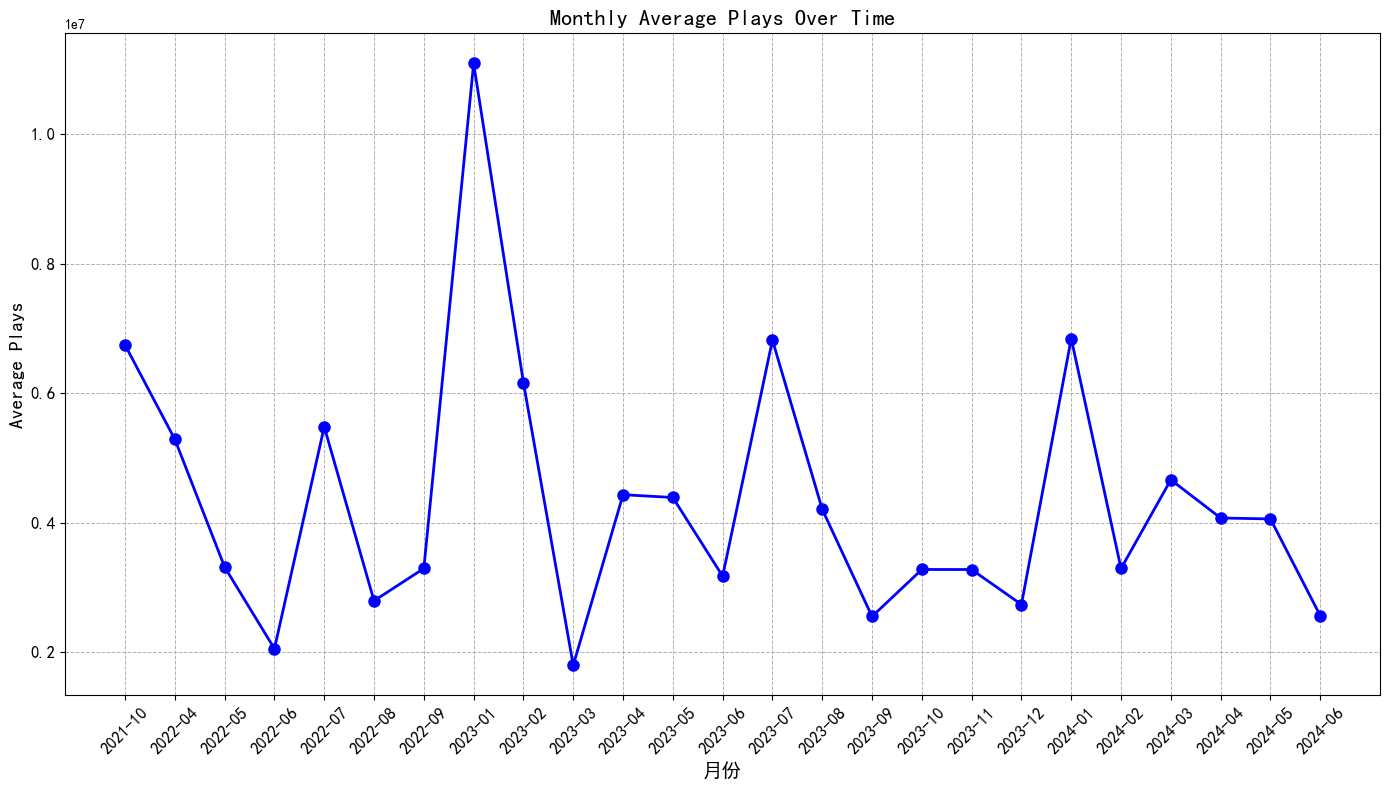

In [37]:
import matplotlib.pyplot as plt

# 创建图表
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg_plays['Month'], monthly_avg_plays['播放量'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('月份', fontsize=14)
plt.ylabel('Average Plays', fontsize=14)
plt.title('Monthly Average Plays Over Time', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()

# 显示图表
plt.show()



In [26]:
df['Year'] = pd.to_datetime(df['上传时间']).dt.strftime('%Y')
yearly_avg_plays = df.groupby('Year')['播放量'].mean().reset_index()


In [27]:
df['年份'] = pd.to_datetime(df['上传时间']).dt.strftime('%Y')
yearly_total_plays_all = df.groupby('年份')['播放量'].sum().reset_index()
yearly_total_plays_all

,年份,播放量
0,2021,6745332
1,2022,33619495
2,2023,329210468
3,2024,221719018


In [28]:
c = (
    Bar()
    .add_xaxis(yearly_total_plays_all['年份'].tolist())
    .add_yaxis("", yearly_total_plays_all['播放量'].tolist())
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="视频可视化", subtitle="每年视频总播放量"),
    )
)
c.render_notebook()

In [29]:
top10 = df[['标题', '弹幕']].sort_values('弹幕', ascending=False)[:10]
names = list(top10['标题'])
counts = list(top10['弹幕'])
c = (
    Bar()
    .add_xaxis(names)
    .add_yaxis("", counts)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="弹幕量Top10"))
#     .render("bar_reversal_axis.html")
)
c.render_notebook()

In [47]:
top10 = df[['标题', '弹幕']].sort_values('弹幕', ascending=False)[:10]
names = list(top10['标题'])
counts = list(top10['弹幕'])

c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add_xaxis(names)
    .add_yaxis("弹幕量", counts, label_opts=opts.LabelOpts(position="right"))
    .reversal_axis()
    .set_series_opts(
        itemstyle_opts=opts.ItemStyleOpts(color="#749f83", border_color="#2f4554", border_width=1),
        label_opts=opts.LabelOpts(position="right", font_size=12, color="#2f4554")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="弹幕量Top10", title_textstyle_opts=opts.TextStyleOpts(font_size=18, color="#2f4554")),
        xaxis_opts=opts.AxisOpts(
            axislabel_opts=opts.LabelOpts(font_size=12, color="#2f4554", rotate=30)
        ),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=12, color="#2f4554"))
    )
)

c.render_notebook()

In [30]:
top10 = df[['标题', '播放量']].sort_values('播放量', ascending=False)[:10]
names = list(top10['标题'])
counts = list(top10['播放量'])
c = (
    Bar()
    .add_xaxis(names)
    .add_yaxis("", counts)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="播放量Top10"))
#     .render("bar_reversal_axis.html")
)
c.render_notebook()

In [31]:
top10 = df[['标题', '评论']].sort_values('评论', ascending=False)[:10]
names = list(top10['标题'])
counts = list(top10['评论'])
c = (
    Bar()
    .add_xaxis(names)
    .add_yaxis("", counts)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="评论量Top10"))
#     .render("bar_reversal_axis.html")
)
c.render_notebook()

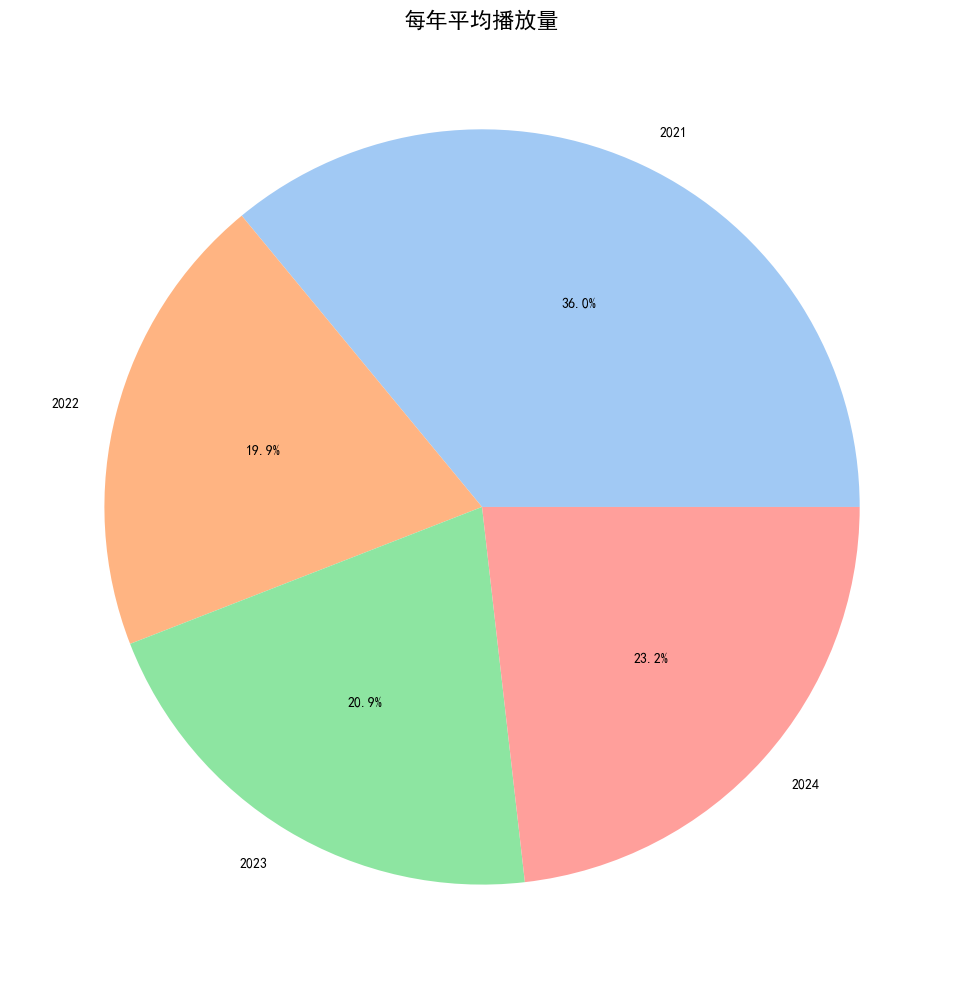

In [41]:
# 不同年份的平均播放量（饼图）
yearly_avg_plays = df.groupby('年份')['播放量'].mean().reset_index()
plt.figure(figsize=(10, 10))
plt.pie(yearly_avg_plays['播放量'], labels=yearly_avg_plays['年份'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('每年平均播放量', fontsize=16)
plt.tight_layout()
plt.show()


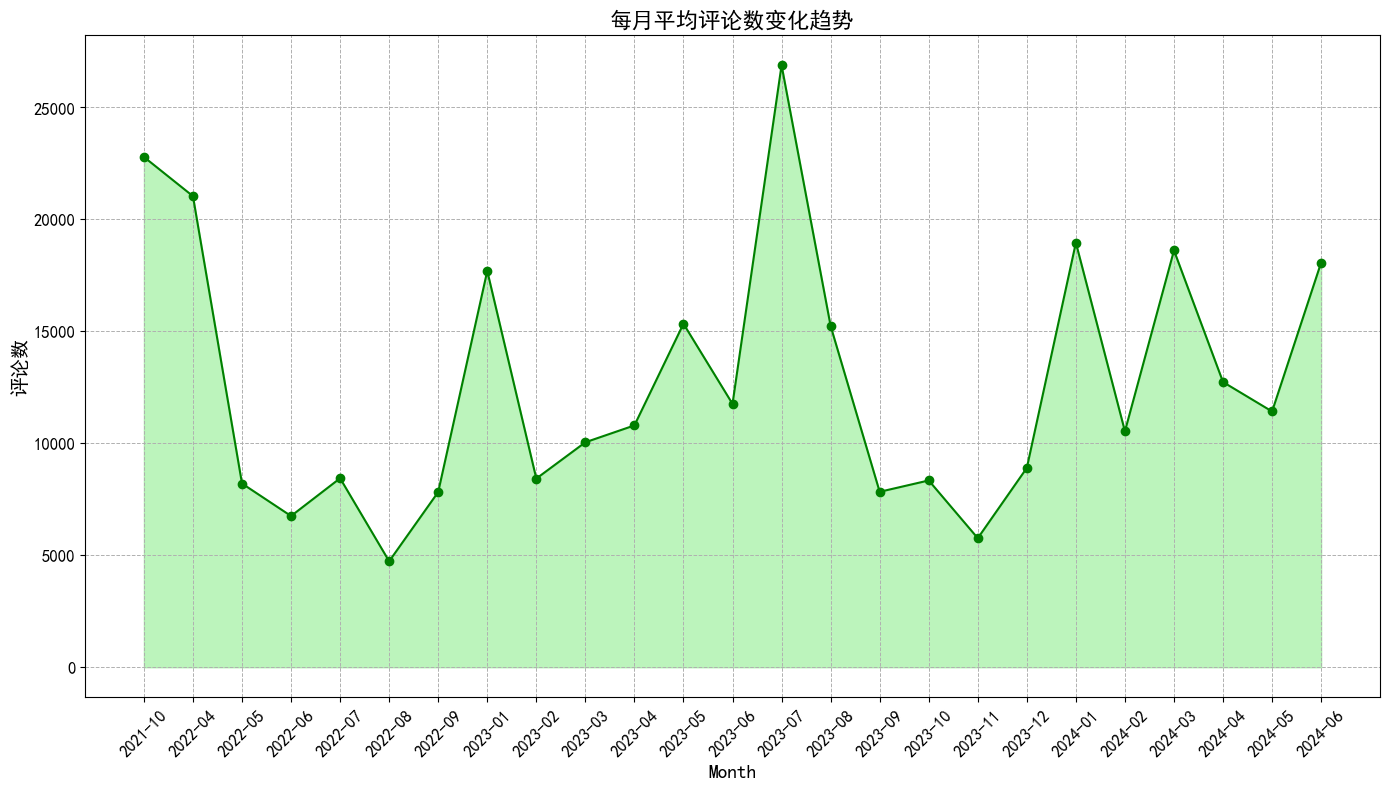

In [43]:
# 每月评论数的变化趋势（面积图）
monthly_avg_comments = df.groupby('Month')['评论'].mean().reset_index()
plt.figure(figsize=(14, 8))
plt.fill_between(monthly_avg_comments['Month'], monthly_avg_comments['评论'], color='lightgreen', alpha=0.6)
plt.plot(monthly_avg_comments['Month'], monthly_avg_comments['评论'], marker='o', color='g')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('评论数', fontsize=14)
plt.title('每月平均评论数变化趋势', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()